In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def replicator_dynamics(frequencies):
    """ Runs a round of the game where people get their
    demand if the sum of two players is less than or equal
    to 10. Otherwise they'll receive zero. Then each player
    chooses one person from the population at random and will
    adopt their strategy if they had a greater payoff than them.
    """
    payoffs = np.zeros((11, 11))
    for i in range(11):
        for j in range(11):
            if i + j <= 10:
                payoffs[i][j] = i
            else:
                payoffs[i][j] += 0

    fitnesses = payoffs / np.sum(payoffs)

    new_frequencies = np.zeros(11)
    for i1 in range(11):
        for j1 in range(11):
            for i2 in range(11):
                for j2 in range(11):
                    if payoffs[i1][j1] >= payoffs[i2][j2]:
                        new_frequencies[i1] += frequencies[i1] * frequencies[j1] * frequencies[i2] * frequencies[j2]
                    else:
                        new_frequencies[i2] += frequencies[i1] * frequencies[j1] * frequencies[i2] * frequencies[j2]

    return new_frequencies / np.sum(new_frequencies)

In [11]:
def plot_strategy_frequencies(frequencies_over_turns):
    strategies = np.arange(11)
    turns = len(frequencies_over_turns)
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'tab:orange', 'tab:purple', 'tab:brown']
    strategies_over_turns = np.array(frequencies_over_turns).T

    for i in range(len(strategies_over_turns)):
        plt.plot(np.arange(turns), strategies_over_turns[i], color=colors[i], label=f"Demand {i}")

    plt.xlabel('Turn')
    plt.ylabel('Frequency')
    plt.title('Frequency of Demands in the Population over Turns')
    plt.legend()
    plt.show()

In [12]:
initial_frequencies = np.random.random(11)
initial_frequencies /= np.sum(initial_frequencies)

In [13]:
turns = 20
frequencies_over_turns = [initial_frequencies]

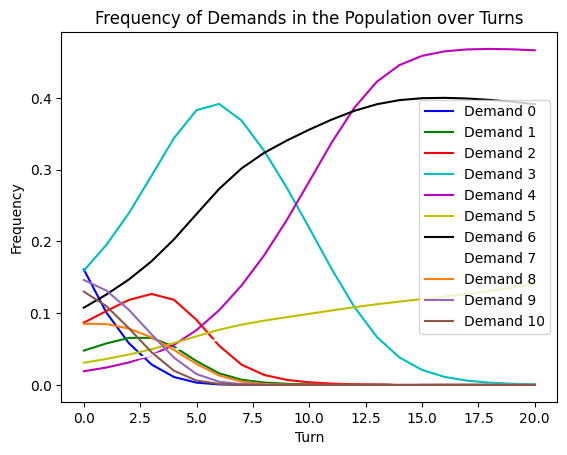

In [14]:
for _ in range(turns):
    new_frequencies = replicator_dynamics(frequencies_over_turns[-1])
    frequencies_over_turns.append(new_frequencies)

plot_strategy_frequencies(frequencies_over_turns)

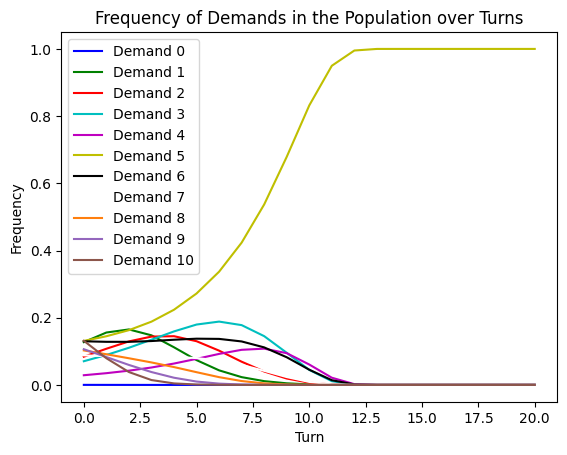

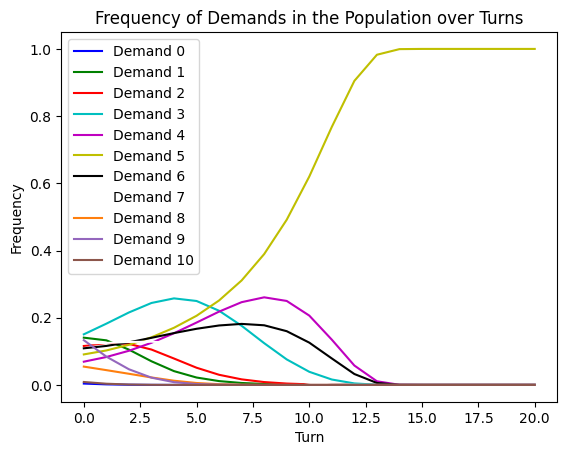

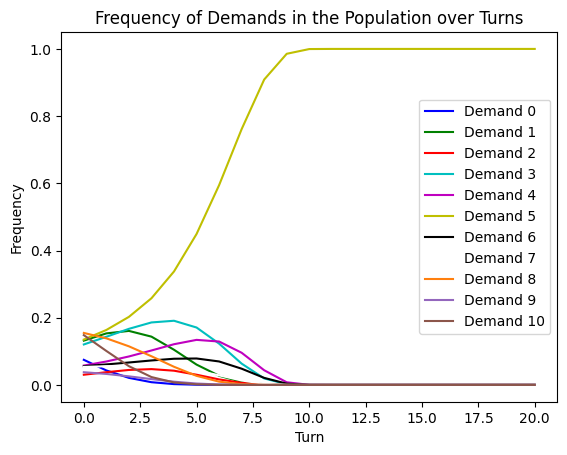

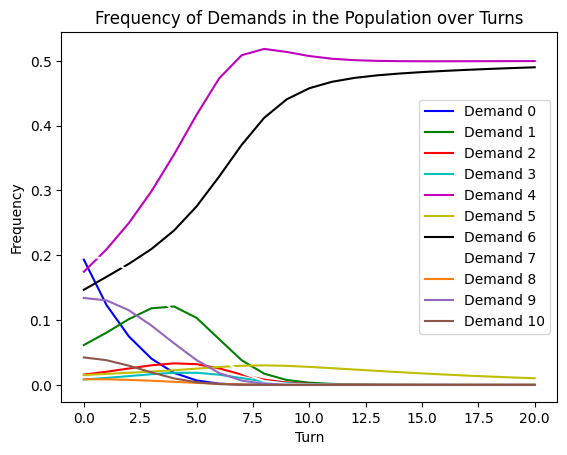

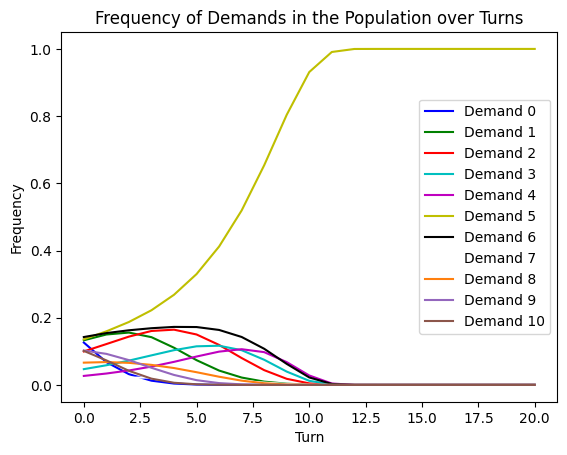

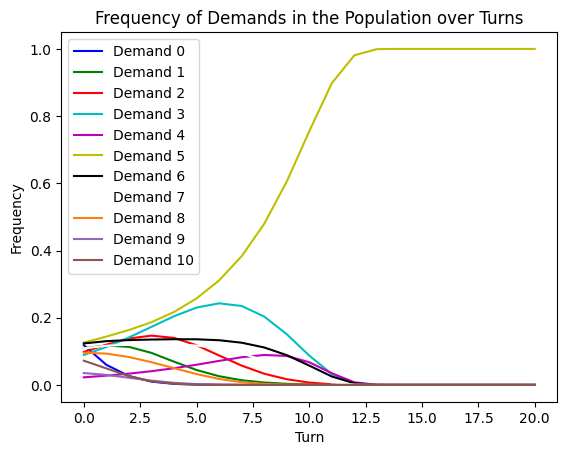

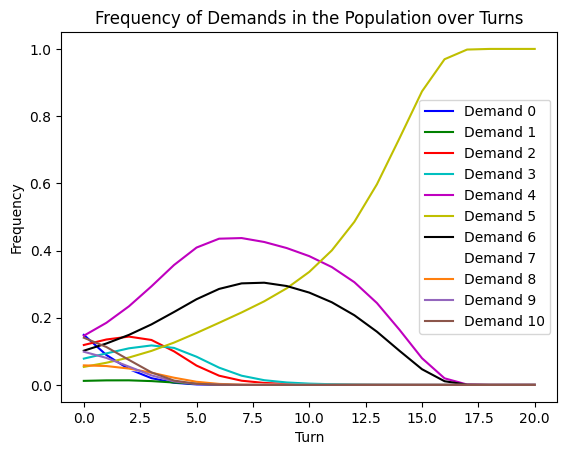

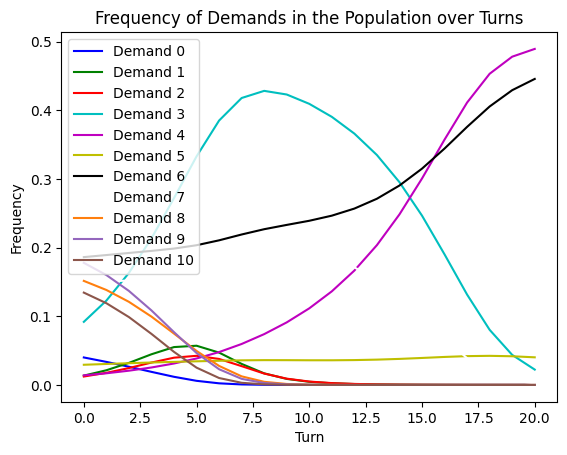

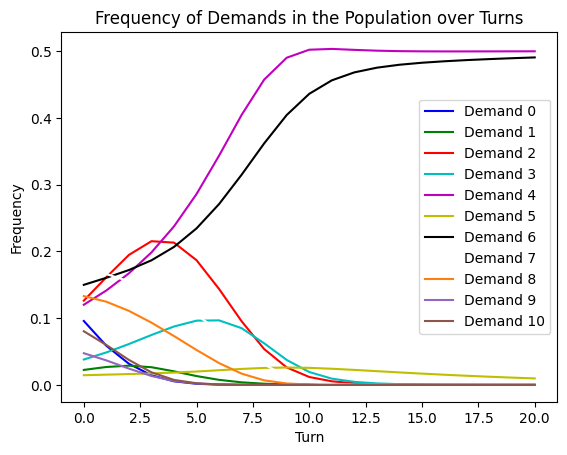

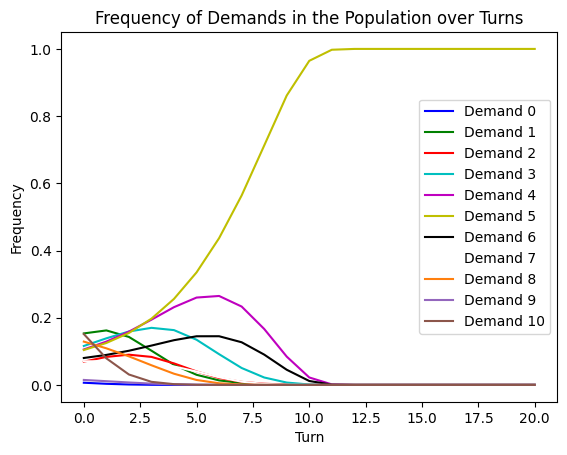

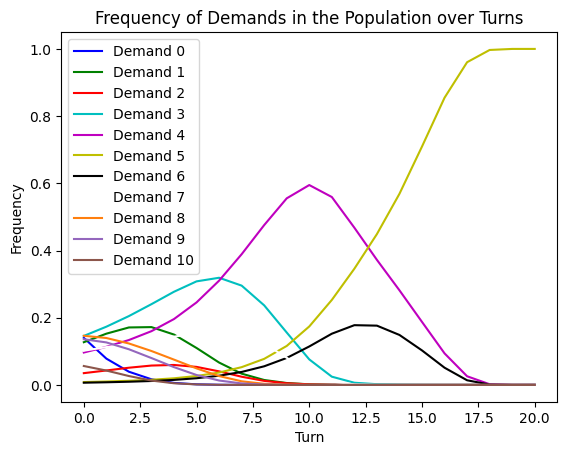

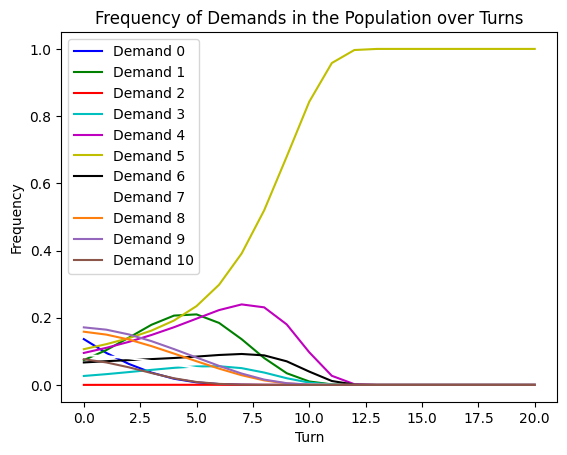

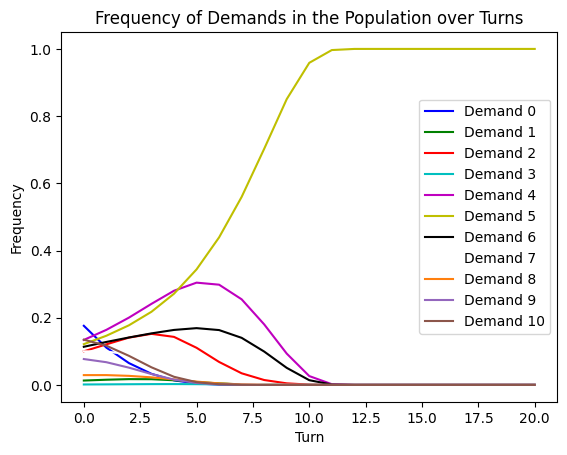

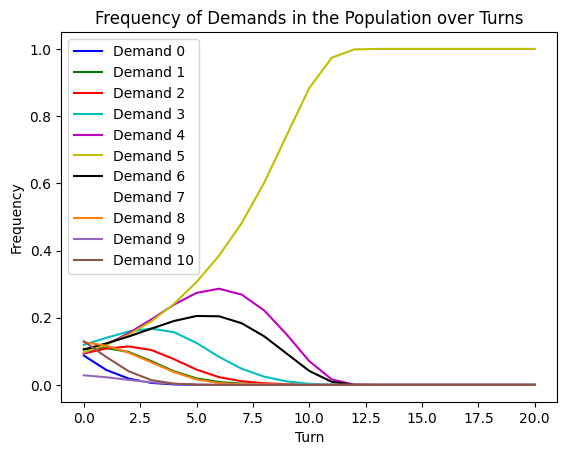

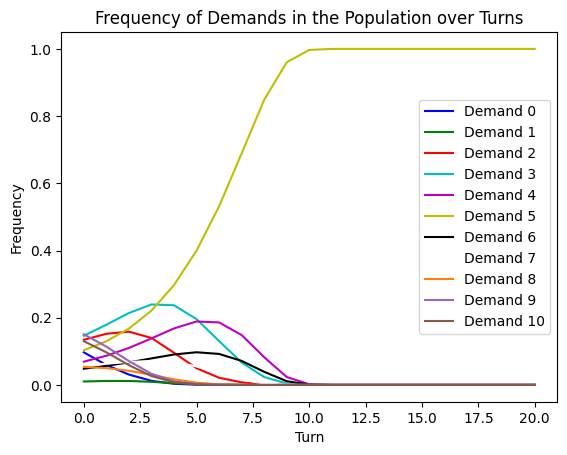

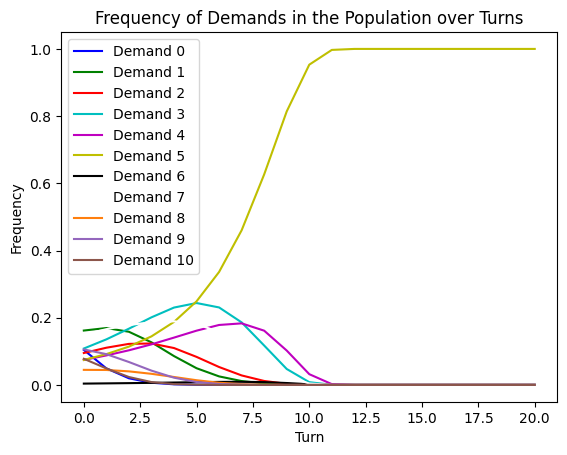

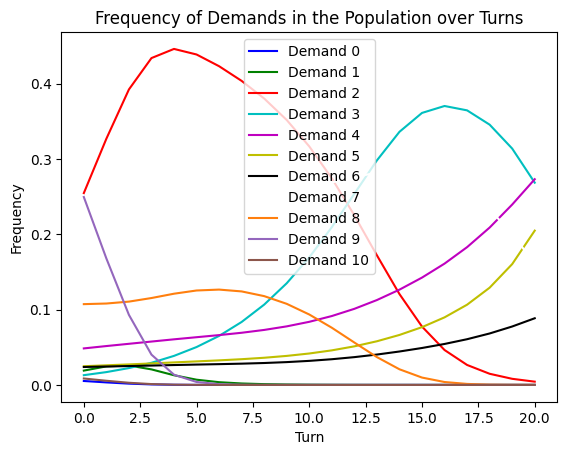

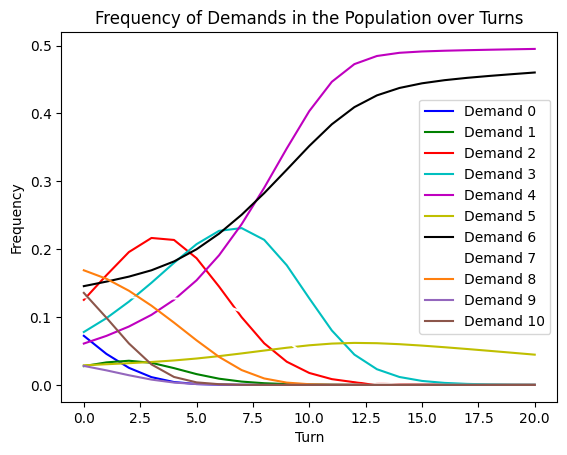

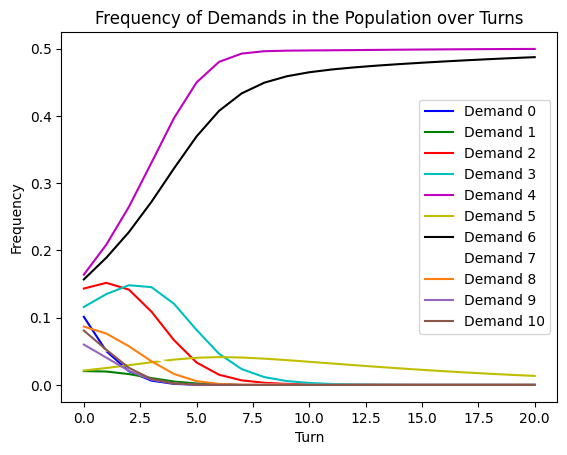

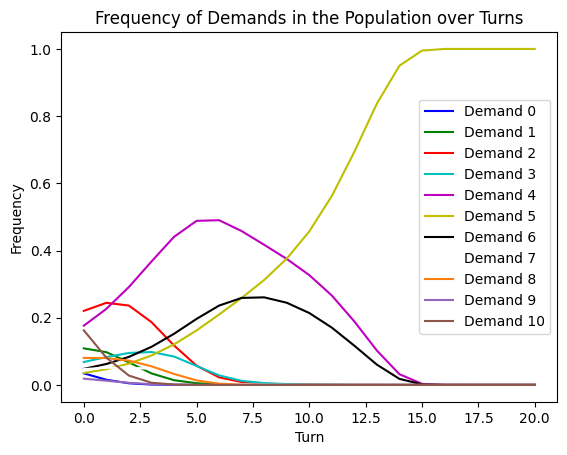

In [15]:
for _ in range(20):
    initial_frequencies = np.random.random(11)
    initial_frequencies /= np.sum(initial_frequencies)

    turns = 20
    frequencies_over_turns = [initial_frequencies]

    for _ in range(turns):
        new_frequencies = replicator_dynamics(frequencies_over_turns[-1])
        frequencies_over_turns.append(new_frequencies)

    plot_strategy_frequencies(frequencies_over_turns)